In [1]:
%matplotlib notebook

In [2]:
from genelife import *

## Initialization

See additional discussion in the [genelife wiki](https://github.com/js1200/genelife/wiki/Probability-parameters-in-genelife).

The code determining the effect of genes on birth, and the mutation of genomes is currently on lines 229-242 of `subgene.c`.

* param `rulemod=1` => genetically alteration of GOL rule kicks in

Possible replication schemes for case of 2 live nbrs:

* `selection == 0` larger integer value determines survival
* `selection == 1` greater number of ones in sequence, if equal then larger value, for survival
* `selection == 2` compete model (Norman) : mutual and distances to 0 all less than ncoding
* `selection == 3` selection based on closeness to one of the two difft targets (ncoding bits apart)

* param `nlog2pmut` fixes mutation probability



In [3]:
offsets = [[0,0,0],
       [-1, 0, 0],
       [-1, 1, 0],
       [0, 1, 0],
       [1, 1, 0],
       [1, 0, 0],
       [1, -1, 0],
       [0, -1, 0],
       [-1, -1, 0]]
numHis = pow(2,len(offsets))
histo=np.zeros(numHis,np.uint64)
flatoff =  [x for sublist in offsets for x in sublist]
npoffsets = np.array(flatoff,np.int32)

runparams = np.zeros(5,np.int32)
simparams = np.zeros(5,np.int32)    # 5 parameters passed to C

Note:  to get the nices possible display, go to the [this site ](http://www.infobyip.com/detectmonitordpi.php) to set `my_dpi` in the next cell properly for your display.

In [4]:
# for my_dpi go to http://www.infobyip.com/detectmonitordpi.php
my_dpi=102.4

Following animation cell is set up to display for `ndisp` time steps, run without display for `nskip` time steps, and repeat, up to a total of `niter*ndisp` frames displayed (`niter*(ndisp+nskip)` total time steps):

|---`ndisp`---|------------------`nskip`---------------| ... repeated for `niter` times


In [5]:
#def doanimation(nrun=1,ndisp=1000,niter=1):    
nrun=1; nskip = 500; ndisp=100; niter=10
cnt=0
#fig, ax = plt.subplots(figsize=(10,10))
#fig, ax = plt.subplots(figsize=((3*256)/my_dpi, (3*256)/my_dpi), dpi=my_dpi, frameon=False)
#ax.axis('off')

colorgrid(N)
def update_anim(data):
    global gol, cgrid
    global golg
    global log2N
    global simparams
    global cnt
    global framenr
    global mat
    cnt = cnt+1
    if cnt % ndisp == 0:  # insert the non-displayed iterations
        genelife.genelife_update(nskip, 0)
        framenr = framenr + nskip
    genelife.genelife_update(nrun, 0)
    genelife.get_curgol(gol)
    genelife.get_curgolg(golg)
    framenr = framenr+nrun
    colorgrid(N)
    mat.set_data(cgrid)
    time_text.set_text('cnt = %.1d' % framenr)
    time_text.set_color('w')
    return mat


In [6]:
nrun=1; nskip = 1800; ndisp=200; niter=2;  # changed from niter 10 just for quicker exploration

rulemod = runparams[0] = 1               # 0,1 whether to allow GoL rule modifications
repscheme = runparams[1] = 4             # 3 or 4, if 3 then choose lowest bit position, if 4 choose most different
selection = runparams[2] = 3             # fitness for 2 live neighbor rule : 0-3 see subgenelife.c code
overwritemask = runparams[3] = 3         # mask of 2 bits to overwrite instead of survival for 3(bit0) or 2(bit1) live nbs
survival = runparams[4] = 0              # survive mask for two (bit 1) and three (bit 0) live neighbours

nlog2pmut = simparams[0] = 9             # gene mutation probability
initial1density = simparams[1] = 16384   # initial 1 density in GOL state
                                         # 16384 = nearest to half of guaranteed C rand max value 32767 = 2**15 - 1
initialrdensity = simparams[2] = 32768   # initial density of random genes
ncoding = simparams[3] = 24              # no of bits used to encode valid connection functions 1-16
startgenechoice = simparams[4] = 8       # initialize genes to startgene number 0-8 : 8 is random choice of 0-7

genelife.initialize_planes(npoffsets)
genelife.initialize(runparams,simparams)
framenr = 0

<IPython.core.display.Javascript object>


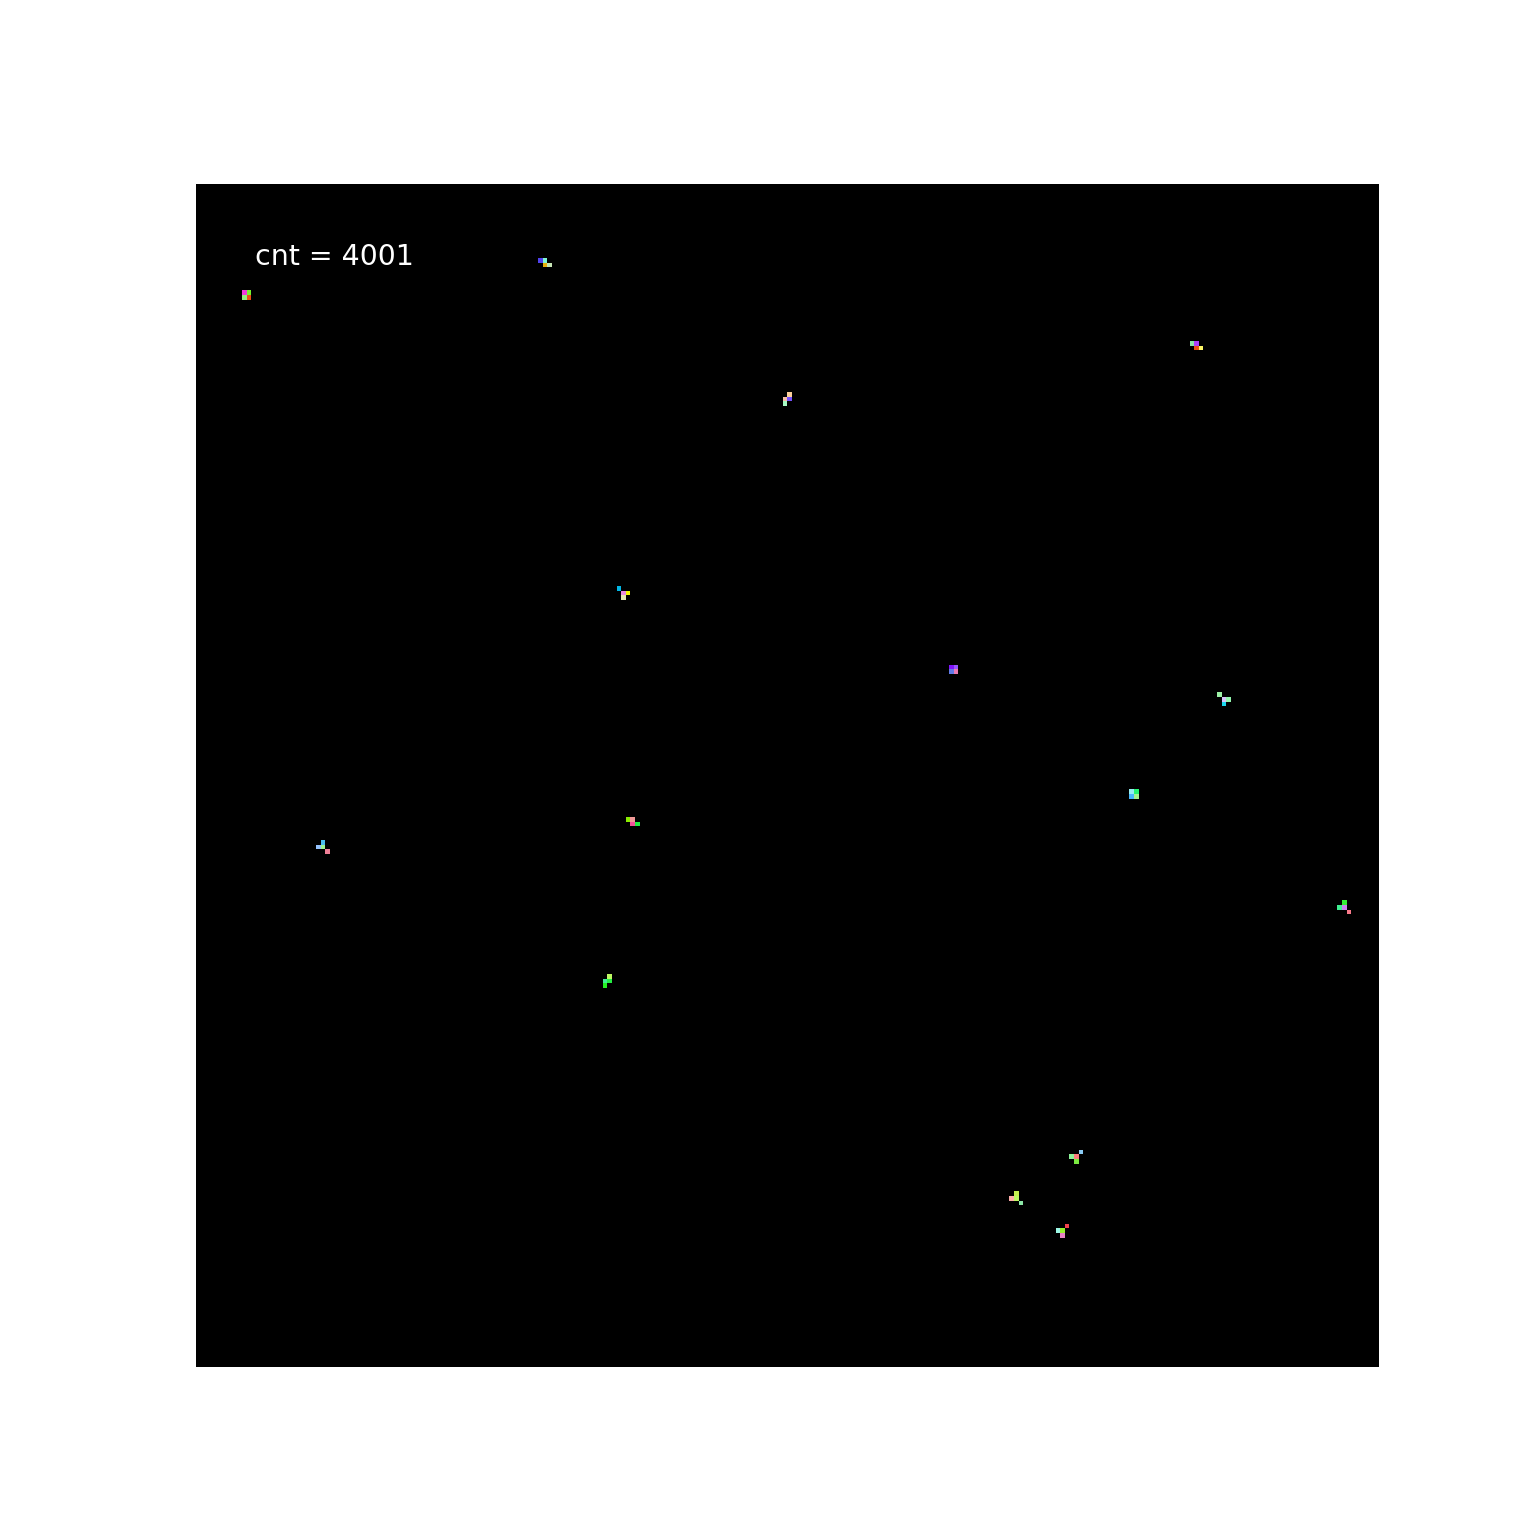

In [7]:
fig, ax = plt.subplots(figsize=((3*256)/my_dpi, (3*256)/my_dpi), dpi=my_dpi, frameon=False)
time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
ax.axis('off')
mat = ax.matshow(cgrid, cmap=my_cmap, vmin=0.01, vmax=257)  # was vmax = LEN+1
ani = animation.FuncAnimation(fig, update_anim, interval=60, # ~60 ms to see every time step
                              save_count=0, frames=niter*ndisp, repeat = False)
plt.show()

In [8]:
genelife.countspecies(golg,runparams)